# Animate centerline using output of reduced dimension


In [11]:
 # imports
 #!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import randomized_svd
 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from dotenv import dotenv_values 
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

from util import *
config = dotenv_values(".env")


In [12]:
# Read in data and build data matrices
filepath = config["currentDirectory"] + "data/processedData/processedData_policySeed_0.npz"

Ndata = 2000 # number of timesteps worth of data to grab from each file
Nepisodes = 1 # number of episodes worth of data to aggregate into each data matrix

with np.load(filepath) as data:
    centerlineData = data['centerlineData']

centerlineOffset = centerlineData[0,:]
# centerlineData[:] = centerlineData-centerlineOffset



In [9]:
# initialize variables for reduced centerline data
n = 20 # number of discrete points to use for centerline
N_local = 3 # number of local points to use when averaging around each discrete point
numTimeSteps = centerlineData.shape[0]
centerlineData_reduced= np.zeros((numTimeSteps,n))

# # Iterate through each timestep to get reduced centerline
# for i in range(numTimeSteps):
#     # Get centerline data at current timestep
#     centerlineData_current = centerlineData[i,:]
#     # reshape centerline data into 2D array
#     centerlineData_current = np.reshape(centerlineData_current,(int(centerlineData_current.size/3),3))
#     # get reduced centerline data
#     centerlineData_reduced = reduceCenterline(n,centerlineData_current,N_local)
#     plt.plot(centerlineData_reduced[:,0],centerlineData_reduced[:,1])
#     # plt.scatter(centerlineData_current[:,0],centerlineData_current[:,2])


t:  58%|█████▊    | 577/1001 [05:43<00:26, 15.72it/s, now=None]

Moviepy - Building video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterline0.mp4.
Moviepy - Writing video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterline0.mp4



t:  58%|█████▊    | 577/1001 [07:08<00:26, 15.72it/s, now=None]

Moviepy - Done !
Moviepy - video ready /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterline0.mp4


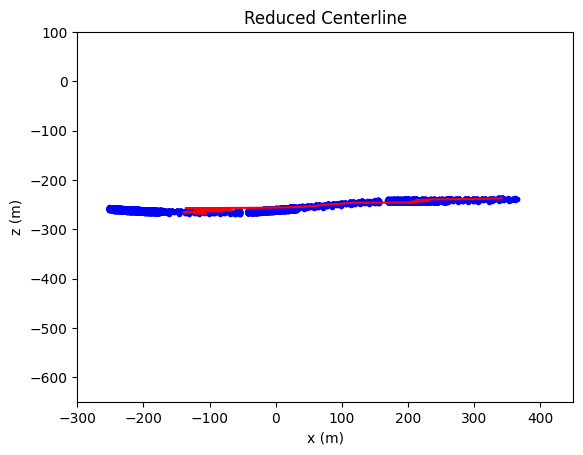

In [10]:
# Configure save path for video
savePath = config["currentDirectory"] +"data/visualizations/"
saveName = "reducedCenterline0.mp4"
numFrames = 1999
fps = 30
duration = numFrames/fps


# Set up figure for animation
fig, ax = plt.subplots()


# Figure parameters
xlim_max = 450
xlim_min = -300 
zlim_max = 100
zlim_min = -650

# Animation callback
def animate(t):
    global centerlineData
    # Get frame index
    i = int(round(t*fps))
    # Compute reduced centerline
    centerlineData_current = centerlineData[i,:]
    centerlineData_current = np.reshape(centerlineData_current,(int(centerlineData_current.size/3),3))
    centerlineData_reduced = reduceCenterline(n,centerlineData_current,N_local)
    # Plot mesh points from original centerline
    ax.clear()
    ax.scatter(centerlineData_current[:,2],centerlineData_current[:,0],marker='.',color='blue')
    # Plot reduced centerline
    ax.plot(centerlineData_reduced[:,1],centerlineData_reduced[:,0],color='red')
    ax.set_xlim(xlim_min,xlim_max)
    ax.set_ylim(zlim_min,zlim_max)
    # ax.set_aspect('equal')
    ax.set_title("Reduced Centerline")
    ax.set_xlabel("x (m)")
    ax.set_ylabel("z (m)")
    return mplfig_to_npimage(fig)

# Create animation
animation = VideoClip(animate, duration=duration)
animation.write_videofile(savePath+saveName, fps=fps)
    


In [15]:
# Test reduced centerline utility function for full episode
fullReducedCenterline = reduceCenterlineFullEpisode(n,centerlineData,N_local).transpose()

Moviepy - Building video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterlineFullEpisode.mp4.
Moviepy - Writing video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterlineFullEpisode.mp4



Moviepy - Done !
Moviepy - video ready /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/reducedCenterlineFullEpisode.mp4


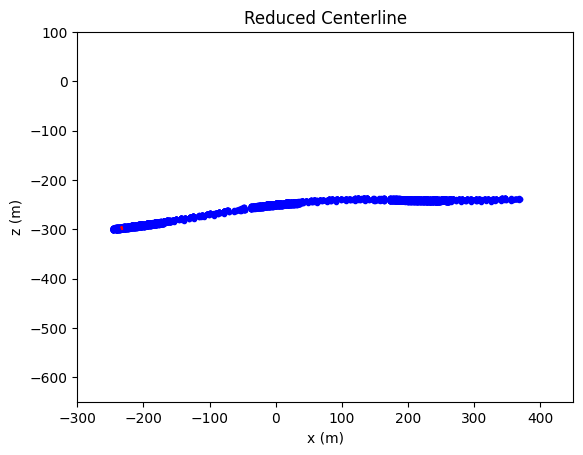

In [17]:
# Generate video from full episode centerline reduction to make sure it looks same as original animation
# Configure save path for video
savePath = config["currentDirectory"] +"data/visualizations/"
saveName = "reducedCenterlineFullEpisode.mp4"
numFrames = 1999
fps = 30
duration = numFrames/fps
# Set up figure for animation
fig, ax = plt.subplots()


# Figure parameters
xlim_max = 450
xlim_min = -300 
zlim_max = 100
zlim_min = -650

# Animation callback
def animate(t):
    global centerlineData
    global fullReducedCenterline
    # Get frame index
    i = int(round(t*fps))
    # Reshape original centerline
    centerlineData_current = centerlineData[i,:]
    centerlineData_current = np.reshape(centerlineData_current,(int(centerlineData_current.size/3),3))
    # Reshape reduced centerline
    centerlineData_reduced = fullReducedCenterline[:,i]
    centerlineData_reduced = np.reshape(fullReducedCenterline[:,i],(int(centerlineData_reduced.size/2),2))
    # Plot reduced centerline
    ax.clear()
    ax.scatter(centerlineData_current[:,2],centerlineData_current[:,0],marker='.',color='blue')
    ax.plot(centerlineData_reduced[:,1],centerlineData_reduced[:,0],color='red')
    ax.set_xlim(xlim_min,xlim_max)
    ax.set_ylim(zlim_min,zlim_max)
    # ax.set_aspect('equal')
    ax.set_title("Reduced Centerline")
    ax.set_xlabel("x (m)")
    ax.set_ylabel("z (m)")
    return mplfig_to_npimage(fig)

# Create animation
animation = VideoClip(animate, duration=duration)
animation.write_videofile(savePath+saveName, fps=fps)

    
    